<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/flyingplanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import graphviz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display



In [ ]:
sent='Flying planes can be dangerous'

In [ ]:
grammar = """
    GERUND_PHRASE: {<VBG><NNS>}                # Gerund Phrase
    NP: {<DT>?<JJ>*<NNS>}                      # Noun Phrase
    VP: {<MD><VB><JJ>}                         # Verb Phrase for modal verbs
    ADJP: {<RB>*<JJ>}                          # Adjective Phrase
"""


parser = nltk.RegexpParser(grammar)

In [ ]:
#  Tokenizing and tagging
tokens = nltk.word_tokenize(sent)
tagged = nltk.pos_tag(tokens)
print(f'tokens are {tokens}')
print(f'POS tags are {tagged}')

tokens are ['Flying', 'planes', 'can', 'be', 'dangerous']
POS tags are [('Flying', 'VBG'), ('planes', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('dangerous', 'JJ')]


In [ ]:
tagged

[('Flying', 'VBG'),
 ('planes', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('dangerous', 'JJ')]

In [ ]:
# Create tree
tree = parser.parse(tagged)
print(tree)

(S
  (GERUND_PHRASE Flying/VBG planes/NNS)
  (VP can/MD be/VB dangerous/JJ))


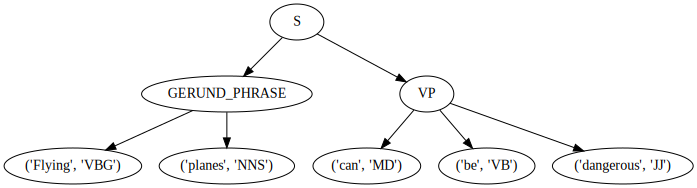

In [ ]:
dot_source1 = to_graphviz(tree)
display(dot_source1)

In [ ]:
# prompt: in tagged replace VBG for Flying with JJ and name new list tagged_alt

for i in range(len(tagged)):
  if tagged[i][0] == 'Flying':
    tagged_alt = tagged.copy()
    tagged_alt[i] = ('Flying', 'JJ')
    break


In [ ]:
tagged_alt

[('Flying', 'JJ'),
 ('planes', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('dangerous', 'JJ')]

In [ ]:
# Create tree
tree_alt = parser.parse(tagged_alt)
print(tree_alt)

(S (NP Flying/JJ planes/NNS) (VP can/MD be/VB dangerous/JJ))


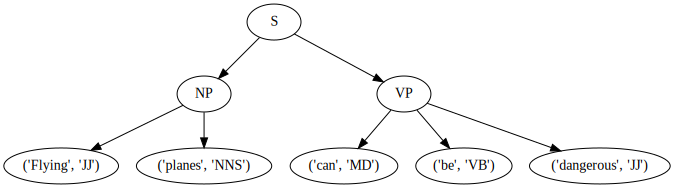

In [ ]:
dot_source_alt = to_graphviz(tree_alt)
display(dot_source_alt)

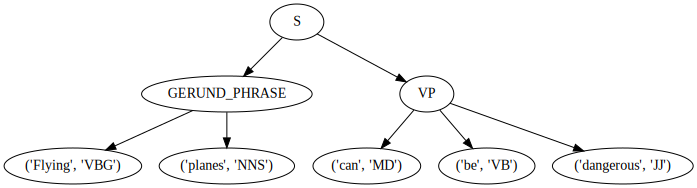

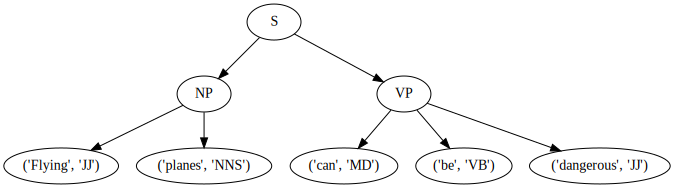

In [ ]:
display(dot_source1)
display(dot_source_alt)